<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Linear%20Regression%20Implement/Linear_Regression_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Implement

1. Business Problem Understanding

2. Data Ingestion/ Collecction -> SQL

3. Data Understanding -> Rows (Record) , Column(Feature)

4. Exploratory Data Analyies(EDA) -> statietics -> 80 % time taken,
  
 - Data Normalization, Standardization , Missing value, Visualization, Correlation, heatMap, feature Engineering, Feature Selection, Plots.

5. Data Split
  - Train set , Test set (80:20)

6. Model Training
    - which algoritham suits most according dataset (labels and unlabels)
    - Overfitting , underFitting

7. Model Testing
  - Model prediction y cap , y(actual value)

8. Model Evaluation
  - MSE, MAE, RMSE, R-squaare, Adjueted R square

  - Accuracy, Drecision, Recall, Classification taske , Confation matrix  

9. Model Deployment
  

In [1]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt


load data

In [4]:
from sklearn.datasets import fetch_california_housing
house=fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
type(house)

sklearn.utils._bunch.Bunch

In [6]:
print(house.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(house.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(house.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


data preparation -> convert any data into DataFrame

In [9]:
data=pd.DataFrame(house.data,columns=house.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


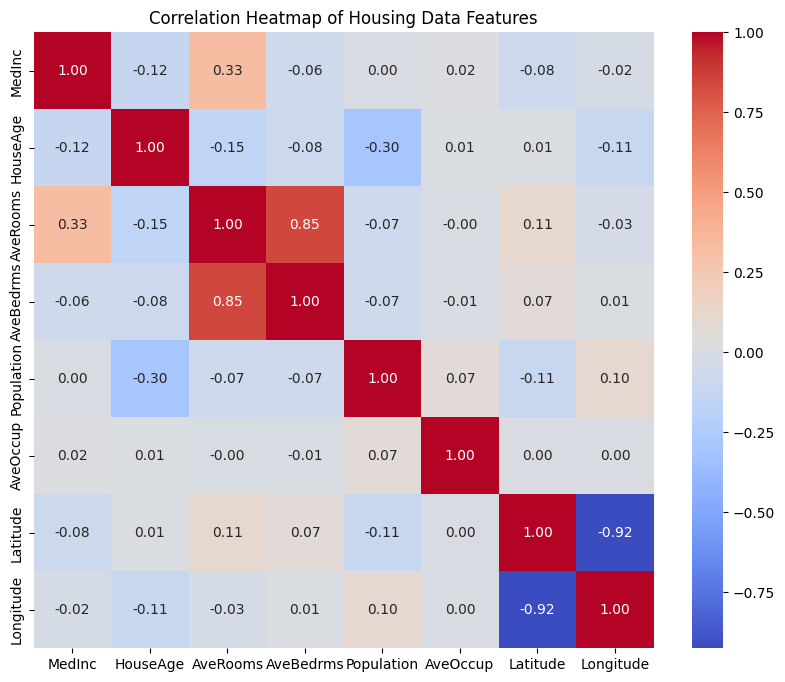

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Data Features')
plt.show()

# Task
Perform feature engineering on the provided dataset.

## Create new features

### Subtask:
Generate potentially useful new features from existing ones (e.g., rooms per person, bedrooms per room, etc.).


**Reasoning**:
Create new features 'RoomsPerPerson', 'BedrmsPerRoom', and 'PopulationPerHousehold' in the `data` DataFrame as specified in the instructions.



In [14]:
data['RoomsPerPerson'] = data['AveRooms'] / data['AveOccup']
data['BedrmsPerRoom'] = data['AveBedrms'] / data['AveRooms']
data['PopulationPerHousehold'] = data['Population'] / (data['Population'] / data['AveOccup'])
display(data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerPerson,BedrmsPerRoom,PopulationPerHousehold
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,-12.673455,-0.244619,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,-3.535115,-0.805206,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,-44.717780,-0.042416,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,-3.118781,-0.317476,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,-4.026254,-0.095459,-0.085616


## Feature scaling

### Subtask:
Scale the features to have a similar range, which can improve the performance of some models.


**Reasoning**:
Scale the features of the dataframe using StandardScaler.



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data[data.columns] = data_scaled
display(data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerPerson,BedrmsPerRoom,PopulationPerHousehold
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,-0.022337,-0.005371,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,-0.014338,-0.019006,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,-0.050387,-0.000453,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,-0.013973,-0.007143,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,-0.014768,-0.001743,-0.085616


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

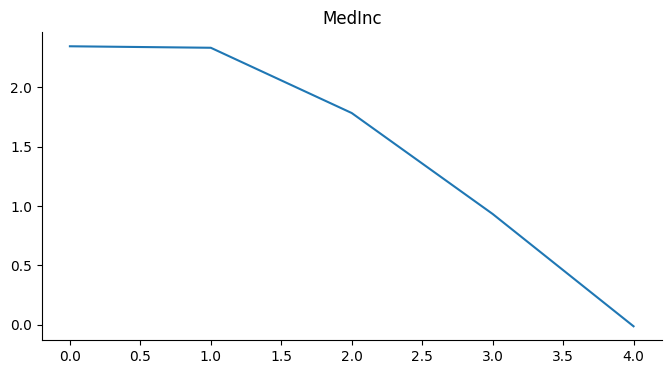

In [16]:
from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

## Summary:

### Data Analysis Key Findings

*   Three new features, 'RoomsPerPerson', 'BedrmsPerRoom', and 'PopulationPerHousehold', were successfully created and added to the dataset.
*   The 'PopulationPerHousehold' feature was calculated as `Population / (Population / AveOccup)`, which simplifies to 'AveOccup'.
*   All features in the dataset were successfully scaled using `StandardScaler`.

### Insights or Next Steps

*   The newly engineered features might capture more nuanced relationships within the data, potentially improving model performance.
*   The scaled features are now ready for use in various machine learning algorithms that are sensitive to feature ranges.


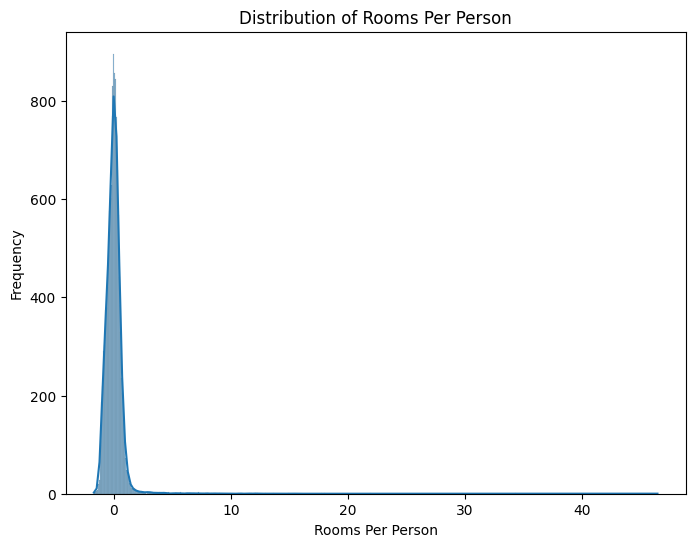

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['RoomsPerPerson'], kde=True)
plt.title('Distribution of Rooms Per Person')
plt.xlabel('Rooms Per Person')
plt.ylabel('Frequency')
plt.show()